#  PRÁCTICA 6 CAN-GIA.  INTEGRACIÓN 

En esta práctica veremos cómo usar **Python** para resolver problemas de integración, aproximar integrales mediante fórmulas de cuadratura numérica, y calcular áreas y volúmenes.

## Objetivos 

* Calcular integrales de forma exacta
* Calcular integrales de forma aproximada mediante fórmulas de cuadratura numérica
* Cálcular áreas y volúmenes

Cargamos algunas librerías que vamos a precisar:

In [1]:
import sympy as sp
import numpy as np
import scipy  

## 6.1 Integración exacta


En primer lugar, calculamos integrales de forma exacta usando la instrucción `integrate` de la libreria **SymPy**.

A modo de ejemplo, calculamos la integral indefinida $\int e^x\,dx$:

In [ ]:
# Definimos la variable simbólica x, real
x = sp.Symbol('x', real=True) 
# Definimos la expresión simbólica f
f = sp.exp(x)
# Calculamos una primitiva de f
primitiva = sp.integrate(f,x)   
print(primitiva)

Calculamos ahora la integral definida $\int_0^2e^x\,dx$:  

In [ ]:
# Para calcular una integral definida, indicamos el intervalo de integración:
I_exacta = sp.integrate(f,(x,0,2)) 
  
print(I_exacta)
# Valor aproximado de la integral
print(I_exacta.evalf())   

In [ ]:
arc = sp.asin(x)

iarc = sp.integrate(arc, x)

display(iarc)

### Ejercicio 1

Calcula las integrales siguientes: 

a) $\displaystyle\int_{-3}^3 \sqrt{9-x^2}\,dx $

b) $\displaystyle\int_{1}^4 x\,\ln(x)\,dx $

c) $\displaystyle\int_1^2 \ln(x) \, dx $  

d) $\displaystyle\int_0^1 e^{x^2} \,dx $

e) $\displaystyle\int_2^4 \dfrac {1}{x}\,(x^3 +2\,x-1) \,dx $


In [ ]:
#TU CÓDIGO AQUÍ

a = sp.sqrt(9 - x*x)
display(sp.integrate(a , (x, -3, 3)))

b = x*sp.log(x)
display(sp.integrate(b , (x, 1, 4)))

c = sp.log(x)
display(sp.integrate(c , (x , 1, 2)))

d = sp.E**(x*x)
display(sp.integrate(d , (x , 0 , 1)))

e = (1/x)* (x**3 + 2*x**2 -1)
display(sp.integrate(e , (x, 2 , 4)))

Es posible calcular integrales cuando los límites de integración dependen de un parámetro. Por ejemplo, 
$$
\int_0^t e^x\,dx\,.
$$

In [ ]:
# Definimos el parámetro t, real
t = sp.Symbol('t', real=True) 
# Integramos entre 0 y t

expr = sp.exp(x)

I_parametro = sp.integrate(expr,(x,0,t))
print(I_parametro)

### Ejercicio 2

Calcula $$\int_t^1 x \,e^{x} dx $$

In [ ]:
#TU CÓDIGO AQUÍ
f = x*sp.E**x

I_parametro = sp.integrate(f, (x, t , 1))

display(I_parametro)

In [ ]:
f2 = sp.sin(t)/t

I_par2 = sp.integrate(f2, (t , 1 , x))

display("Primitiva de la función" ,I_par2)

df2 = sp.diff(I_par2, x)

display("Derivada de la primitiva" , df2)

extr = sp.solve(df2 , x, )
display(extr)

# ...

## 6.2 Integración numérica

### Ejercicio 3

1. Construye una función en **Python** que permita aproximar la integral definida de una función dada mediante la fórmula del punto medio.
2. Calcula $\displaystyle\int_0^{2\pi} \sin (x) \, dx $.
3. Aproxima la integral del apartado anterior usando la función **Python** construida en el apartado 1.

In [ ]:
#TU CÓDIGO AQUÍ

def f(x):
    return sp.sin(x)

def punto_medio(f , a , b):
    return (b - a) * f((a + b)/2)

In [ ]:
I_exacta = sp.integrate(sp.sin(x),(x , 0 , 2*sp.pi))

display("Exacta:", I_exacta)

I_aprox = punto_medio(f , 0 , 2*sp.pi)

display("Aproximación:", I_aprox)

In [ ]:
def f2(x): 
    return x*sp.exp(x)

I2_aprox = punto_medio(f2 ,0 , 1)

display(I2_aprox)

A continuación, veremos cómo aproximar numéricamente el valor de una integral mediante las librerías **NumPy** y **SciPy**.

### Integración numérica con NumPy

La función `trapz` de **NumPy** implementa la fórmula del trapecio compuesto. Por ejemplo, para calcular 
$$
\int_0^1 (x^3-x^2+1)\,dx
$$
usando $h=10^{-2}$, escribimos:

In [ ]:
nodos = np.linspace(0, 1, num=101)

# Nodos actua como la variable, excribimos la expresión en función de el
print('Aproximación por trapecio compuesto = ',np.trapezoid(nodos**3 - nodos**2 + 1,nodos)) 

x = sp.Symbol('x', real=True)
Int=sp.integrate(x**3-x**2+1,(x,0,1))

print('Valor exacto de la integral = ',Int)
print('Valor numérico de la integral = ',Int.evalf())

Si solo empleamos $2$ puntos, estaremos usando la fórmula del trapecio simple:

In [ ]:
nodos = np.linspace(0, 1, num=2)
np.trapezoid(nodos**3 - nodos**2 + 1, x=nodos)  

### Ejercicio 4

Sea $$I=\int_0^{2\pi} \sin(x) \, dx. $$
1. Utiliza la fórmula del trapecio simple para aproximar $I$.
2. Aproxima el valor de $I$ mediante trapecio compuesto, usando $50$ subintervalos.

In [ ]:
#TU CÓDIGO AQUÍ 
# 2
nodos = np.linspace(0, 2*np.pi, num=51)
print('Aproximación por trapecio compuesto = ',np.trapezoid(np.sin(nodos), nodos)) 

x = sp.Symbol('x', real=True)

Int=sp.integrate(sp.sin(x),(x,0,2*sp.pi))

print('Valor exacto de la integral = ',Int)

print('Valor numérico de la integral = ',Int.evalf())

### Integración numérica con SciPy

En **SciPy** disponemos de una función que nos permite aproximar una integral definida mediante la fórmula de Simpson compuesta.

In [ ]:
import scipy.integrate as integrate  

x1 = np.arange(0,1.001, 0.001)
# x1 = np.linspace(0,1,1001)

y1 = x1**2 # Alternativamente, y1 = x1**2 o y1 = x1 * x1

# Aproximación por la fórmula de Simpson compuesta
aproxsimp = integrate.simpson(y1,x1)  
print(aproxsimp)

### Ejercicio 5

Aproxima el valor de la integral $I$ del ejercicio 4 mediante Simpson compuesto, usando $50$ subintervalos.

In [ ]:

x2 = np.linspace(0 , 2*np.pi , 50)

# y debe ser un array de valores numéricos para SciPy
y_num = np.sin(x2) 

# Cálculo de la aproximación de Simpson
aprox = integrate.simpson(y_num, x2) 
display(aprox)

## 6.3 Cálculo de áreas y volúmenes

Para calcular el área comprendida por una curva $y=f(x)$ y el eje $X$ entre los puntos de abscisa $x=a$ y $x=b$, hay que calcular 
$$
A=\int_a^b|f(x)|\,dx\,.
$$

Por ejemplo, para calcular el área comprendida por $y=\sin(x)$, el eje $X$ y las rectas $x=0$ y $x=2\pi$, escribimos:

In [ ]:
x = sp.Symbol('x',real=True)
f = sp.sin(x)
area = sp.integrate(sp.Abs(f),(x,0,2*sp.pi))
print(area.evalf())

### Ejercicio 6

Sea la función $f$ dada por $f(x) = \sqrt{x}$. Calcula el área limitada por el grafo de $f$ y el eje $OX$ en el intervalo $[1,4]$.

In [ ]:
# TU CÓDIGO AQUÍ
f = sp.sqrt(x)

area = sp.integrate(sp.Abs(f), (x,1,4))
display(area)

Para calcular el área comprendida entre dos curvas, $y=f(x)$ e $y=g(x)$, entre los puntos de abscisa $x=a$ y $x=b$, hay que calcular
$$
A=\int_a^b|f(x)-g(x)|\,dx\,.
$$

Por ejemplo, para calcular el área limitada por las gráficas de $f(x) = x^3$  y $g(x)=x$ en el intervalo $[-1,1]$, escribimos: 

In [ ]:
f = x**3
g = x  


area = sp.integrate(sp.Abs(f-g),(x,-1,1))
print(area.evalf())

Para representar el área gráficamente, procedemos como sigue:

In [ ]:
import matplotlib.pyplot as plt

# Definir las funciones
def f(x):
    return x**3

def g(x):
    return x

# Definir el intervalo
a = -1
b = 1

# Crear un arreglo de valores x en el intervalo [a, b]
x = np.linspace(a, b, 400)

# Calcular los valores de las funciones en esos puntos x
y_f = f(x)
y_g = g(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y_f, label='f(x) = x^3')
plt.plot(x, y_g, label='g(x) = x')

# Rellenar el área entre las dos funciones
plt.fill_between(x, y_f, y_g, label='Área limitada')

# Añadir etiquetas y leyenda
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Área limitada por dos funciones')
plt.legend()

# Mostrar la gráfica
plt.show()

### Ejercicio 7

Sea la función $f$ dada por $f(x) = \sqrt{x}$. Calcula el área encerrada por la gráfica de $f$ y la recta $y=x$.

In [ ]:
# TU CÓDIGO AQUÍ
import matplotlib.pyplot as plt

# Definir las funciones
def f(x):
    return np.sqrt(x)

def g(x):
    return x
# Definir el intervalo
a = 0
b = 1

# Crear un arreglo de valores x en el intervalo [a, b]
x = np.linspace(a, b, 400)

# Calcular los valores de las funciones en esos puntos x
y_f = f(x)
y_g = g(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y_f, label='f(x) = sqrt(x)')
plt.plot(x, y_g, label='g(x) = x')

# Rellenar el área entre las dos funciones
plt.fill_between(x, y_f, y_g, label='Área limitada')

# Añadir etiquetas y leyenda
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Área limitada por dos funciones')
plt.legend()

# Mostrar la gráfica
plt.show()

El volumen de un sólido de revolución generado al girar la gráfica de $y=f(x)$ entre los puntos de abscisa $a$ y $b$ es 
$$
V=\pi\int_a^b[f(x)]^2\,dx\,.
$$

Para calcular el volumen de la figura construida al girar alrededor del eje $OX$
el área limitada por las gráficas $f(x) = x^3$ y $g(x)=x$ en $[-1,1]$, escribimos:

In [ ]:
x = sp.Symbol("x")
f = x**3
g = x  
vol = sp.pi * sp.integrate(g*g - f*f,(x,-1,1))
print(vol.evalf())

Para representar gráficamente el volumen, hacemos lo siguiente:

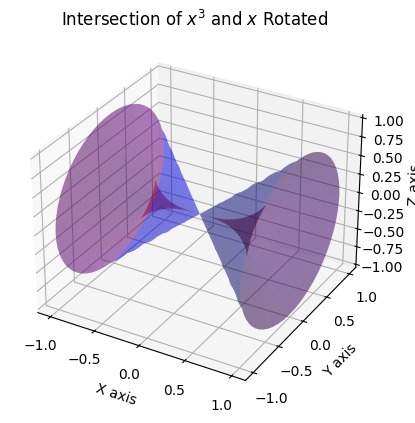

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

u = np.linspace(-1, 1, 60)
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)

X = U
Y1 = (U**3)*np.cos(V)
Z1 = (U**3)*np.sin(V)

Y2 = (U)*np.cos(V)
Z2 = (U)*np.sin(V)

ax.plot_surface(X, Y1, Z1, alpha=0.2, color='red')
ax.plot_surface(X, Y2, Z2, alpha=0.2, color='blue')
plt.show()

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Intersection of $x^3$ and $x$ Rotated')


### Ejercicio 8

Sea la función $f$ dada por $f(x) = \sqrt{x}$. Calcula el volumen del sólido de revolucion obtenido cuando hacemos girar alrededor del eje OX la gráfica de $f$ en el intervalo $[1,4]$.

In [ ]:
# TU CÓDIGO AQUÍ

x = sp.Symbol('x')
g = sp.sqrt(x)  
vol = sp.pi * sp.integrate(g*g,(x,1,4))
print(vol.evalf())

### Ejercicio 9

Demuestra, mediante integración simbólica, la fórmula del volumen de una esfera de radio $R$.

*Ayuda*: Haz girar alrededor del eje $OX$ un semicírculo de radio $R$. 

In [ ]:

x = sp.Symbol('x')
r = sp.Symbol('r')

f = sp.sqrt(r**2-x**2)

vol = sp.pi * sp.integrate(f*f,(x,-r,r))
display(vol.evalf())

### Ejercicio 10

Se han medido las velocidades (en $m/s$) de una partícula en diferentes instantes de tiempo ($s$), $t=0,2,4,...,16$, registrando los valores $v=[3.24,10.07,1.15,2.77,3.93,4.80,2.15,2.57,3.03]$.  
Aproxima, mediante los algoritmos vistos, la distancia $d$ recorrida por la partícula dada por: 
$$\int_0^{16} v(t) \, dt\,. $$

In [ ]:
#TU CÓDIGO AQUÍ